In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize

Data link: https://www.kaggle.com/datasets/datasnaek/mbti-type/data

<font color='lightblue'> <h2>Updated Pre-Processing</h2> </font>

In [30]:
pd.set_option('display.max_colwidth',1000)

In [31]:
# read data from file to a pandas dataframe
mbti_df = pd.read_csv('./mbti_data.csv', header = None, names = ['Type', 'Posts'])
mbti_df.head()


,Type,Posts
0,INFJ,"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ..."
1,ENTP,"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher. Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f..."
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there. And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the las..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358 or 385, though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a hand in every action. Therefore, a...|||I'm not particularly introverted or extraverted, personally. That said, I would say I'm somewhat unphased by either social interactions or being alone. What I'd say I crave more so than anything is...|||Dear Type 9 INFP, Your absolute admiration of me is refreshing. You're a great girlfriend an

In [32]:
mbti_df['Type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: Type, dtype: int64

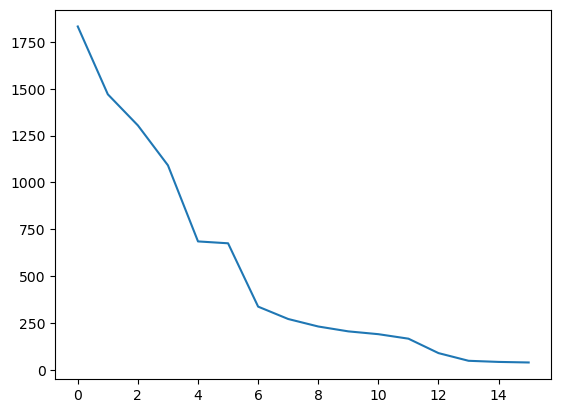

In [33]:
plt.plot(mbti_df['Type'].value_counts().values)

In [34]:
mbti_df['Posts'] = mbti_df['Posts'].astype('str')
mbti_df['Posts']

0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.

In [35]:
def clean_text(text):
    pattern = r'[.,;:__@()%&$#!*^-]+'
    text = text.lower()
    text = re.sub(r'http\S+', r' ', text)
    text = re.sub(r"'", r' ', text)
    text = text.replace("|||"," ")
    text = text.replace("||"," ")
    text = re.sub(pattern, r' ', text)
    return text

In [36]:
mbti_df['Posts'] = mbti_df['Posts'].apply(clean_text)
mbti_df

,Type,Posts
0,INFJ,and intj moments sportscenter not top ten plays pranks what has been the most life changing experience in your life? on repeat for most of today may the perc experience immerse you the last thing my infj friend posted on his facebook before committing suicide the next day rest in peace~ enfj7 sorry to hear of your distress it s only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as 84389 84390 welcome and stuff game set match prozac wellbrutin at least thirty minutes of moving your legs and i don t mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternative basically come up with three items you ve determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left by all things in moderation sims i...
1,ENTP,i m finding the lack of me in these posts very alarming sex can be boring if it s in the same position often for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary there isn t enough giving new meaning to game theory hello entp grin that s all it takes than we converse and they do most of the flirting while i acknowledge their presence and return their words with smooth wordplay and more cheeky grins this + lack of balance and hand eye coordination real iq test i score 127 internet iq tests are funny i score 140s or higher now like the former responses of this thread i will mention that i don t believe in the iq test before you banish you know you re an entp when you vanish from a site for a year and a half return and find people are still commenting on your posts and liking your ideas/thoughts you know you re an entp when you over think things sometimes i go by the old sherlock holmes quot...
2,INTP,good one course to which i say i know that s my blessing and my curse does being absolutely positive that you and your best friend could be an amazing couple count? if so than yes or it s more i could be madly in love in case i reconciled my feelings which at no i didn t thank you for a link so called ti si loop and it can stem from any current topic/obsession can be deadly it s like when you re stuck in your own thoughts and your mind just wanders in circles feels truly terrible have you noticed how peculiar vegetation can be? all you have to do is look down at the grass dozens of different plant species there and now imagine that hundreds of years later when/if soil the smiths – never had no one ever i often find myself spotting faces on marble tiles/wood this 5 year old sentence is an incredibly accurate and beautiful description i haven t visited this website in the last 3 years so whoever reads this and maybe even remembers me which i hi...
3,INTJ,dear intp i enjoyed our conversation the other day esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created dear entj sub long time no see sincerely alpha none of them all other types hurt in deep existential ways that i want no part of probably a sliding scale that depends on individual preferences like everything in humanity draco malfoy also i d say he s either 358 or 368 i m either 358 or 385 though in which stacking to me is a somewhat arbitrary distinction to make as i believe that the core indicates primary motivation and has a hand in every action therefore a i m not particularly introverted or extraverted personally that said i would say i m somewhat unphased by either social interactions or being alone what i d say i crave more so than anything is dear type 9 infp your absolute admiration of me is refreshing you re a great girlfriend and i wish we both didn t have such ...
4,ENTJ,you re fired that s another silly misconception that approaching is logically is going to be the key to unlockin

In [37]:
mbti_df.shape

(8675, 2)

In [38]:
# Drop rows where 'Post' has empty or whitespace-only cells
mbti_df = mbti_df[mbti_df['Posts'].str.strip().str.len() > 0]
mbti_df

,Type,Posts
0,INFJ,and intj moments sportscenter not top ten plays pranks what has been the most life changing experience in your life? on repeat for most of today may the perc experience immerse you the last thing my infj friend posted on his facebook before committing suicide the next day rest in peace~ enfj7 sorry to hear of your distress it s only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as 84389 84390 welcome and stuff game set match prozac wellbrutin at least thirty minutes of moving your legs and i don t mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternative basically come up with three items you ve determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left by all things in moderation sims i...
1,ENTP,i m finding the lack of me in these posts very alarming sex can be boring if it s in the same position often for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary there isn t enough giving new meaning to game theory hello entp grin that s all it takes than we converse and they do most of the flirting while i acknowledge their presence and return their words with smooth wordplay and more cheeky grins this + lack of balance and hand eye coordination real iq test i score 127 internet iq tests are funny i score 140s or higher now like the former responses of this thread i will mention that i don t believe in the iq test before you banish you know you re an entp when you vanish from a site for a year and a half return and find people are still commenting on your posts and liking your ideas/thoughts you know you re an entp when you over think things sometimes i go by the old sherlock holmes quot...
2,INTP,good one course to which i say i know that s my blessing and my curse does being absolutely positive that you and your best friend could be an amazing couple count? if so than yes or it s more i could be madly in love in case i reconciled my feelings which at no i didn t thank you for a link so called ti si loop and it can stem from any current topic/obsession can be deadly it s like when you re stuck in your own thoughts and your mind just wanders in circles feels truly terrible have you noticed how peculiar vegetation can be? all you have to do is look down at the grass dozens of different plant species there and now imagine that hundreds of years later when/if soil the smiths – never had no one ever i often find myself spotting faces on marble tiles/wood this 5 year old sentence is an incredibly accurate and beautiful description i haven t visited this website in the last 3 years so whoever reads this and maybe even remembers me which i hi...
3,INTJ,dear intp i enjoyed our conversation the other day esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created dear entj sub long time no see sincerely alpha none of them all other types hurt in deep existential ways that i want no part of probably a sliding scale that depends on individual preferences like everything in humanity draco malfoy also i d say he s either 358 or 368 i m either 358 or 385 though in which stacking to me is a somewhat arbitrary distinction to make as i believe that the core indicates primary motivation and has a hand in every action therefore a i m not particularly introverted or extraverted personally that said i would say i m somewhat unphased by either social interactions or being alone what i d say i crave more so than anything is dear type 9 infp your absolute admiration of me is refreshing you re a great girlfriend and i wish we both didn t have such ...
4,ENTJ,you re fired that s another silly misconception that approaching is logically is going to be the key to unlockin

In [39]:
null_sum = mbti_df.isnull().sum()
null_sum

Type     0
Posts    0
dtype: int64

In [40]:
mbti_df.shape

(8675, 2)

In [41]:
# # Define a function to strip punctuations from a text
# def strip_functuations(text):
#     return text.replace('.', '').replace('...', '').replace(',', ' ').replace('_____', ' ').replace('|||', ' ').replace(':',' ').replace('@', ' ')

In [42]:
mbti_df['Posts'][:5]

0       and intj moments     sportscenter not top ten plays     pranks what has been the most life changing experience in your life?        on repeat for most of today  may the perc experience immerse you  the last thing my infj friend posted on his facebook before committing suicide the next day  rest in peace~     enfj7  sorry to hear of your distress  it s only natural for a relationship to not be perfection all the time in every moment of existence  try to figure the hard times as times of growth  as  84389  84390         welcome and stuff     game  set  match  prozac  wellbrutin  at least thirty minutes of moving your legs  and i don t mean moving them while sitting in your same desk chair  weed in moderation  maybe try edibles as a healthier alternative  basically come up with three items you ve determined that each type  or whichever types you want to do  would more than likely use  given each types  cognitive functions and whatnot  when left by  all things in moderation   sims 

In [44]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [45]:
lemmatized_mbti_df = mbti_df.copy()

lemmatized_mbti_df['Posts'] = [word_tokenize(post) for post in lemmatized_mbti_df['Posts']]
lemmatized_mbti_df['Posts'] = lemmatized_mbti_df['Posts'].apply(lambda posts_words: [lemmatizer.lemmatize(word) for word in posts_words])


lemmatized_mbti_df

,Type,Posts
0,INFJ,"[and, intj, moment, sportscenter, not, top, ten, play, prank, what, ha, been, the, most, life, changing, experience, in, your, life, ?, on, repeat, for, most, of, today, may, the, perc, experience, immerse, you, the, last, thing, my, infj, friend, posted, on, his, facebook, before, committing, suicide, the, next, day, rest, in, peace~, enfj7, sorry, to, hear, of, your, distress, it, s, only, natural, for, a, relationship, to, not, be, perfection, all, the, time, in, every, moment, of, existence, try, to, figure, the, hard, time, a, time, of, growth, a, 84389, 84390, welcome, and, stuff, game, set, match, prozac, wellbrutin, at, ...]"
1,ENTP,"[i, m, finding, the, lack, of, me, in, these, post, very, alarming, sex, can, be, boring, if, it, s, in, the, same, position, often, for, example, me, and, my, girlfriend, are, currently, in, an, environment, where, we, have, to, creatively, use, cowgirl, and, missionary, there, isn, t, enough, giving, new, meaning, to, game, theory, hello, entp, grin, that, s, all, it, take, than, we, converse, and, they, do, most, of, the, flirting, while, i, acknowledge, their, presence, and, return, their, word, with, smooth, wordplay, and, more, cheeky, grin, this, +, lack, of, balance, and, hand, eye, coordination, real, iq, test, ...]"
2,INTP,"[good, one, course, to, which, i, say, i, know, that, s, my, blessing, and, my, curse, doe, being, absolutely, positive, that, you, and, your, best, friend, could, be, an, amazing, couple, count, ?, if, so, than, yes, or, it, s, more, i, could, be, madly, in, love, in, case, i, reconciled, my, feeling, which, at, no, i, didn, t, thank, you, for, a, link, so, called, ti, si, loop, and, it, can, stem, from, any, current, topic/obsession, can, be, deadly, it, s, like, when, you, re, stuck, in, your, own, thought, and, your, mind, just, wanders, in, circle, feel, truly, ...]"
3,INTJ,"[dear, intp, i, enjoyed, our, conversation, the, other, day, esoteric, gabbing, about, the, nature, of, the, universe, and, the, idea, that, every, rule, and, social, code, being, arbitrary, construct, created, dear, entj, sub, long, time, no, see, sincerely, alpha, none, of, them, all, other, type, hurt, in, deep, existential, way, that, i, want, no, part, of, probably, a, sliding, scale, that, depends, on, individual, preference, like, everything, in, humanity, draco, malfoy, also, i, d, say, he, s, either, 358, or, 368, i, m, either, 358, or, 385, though, in, which, stacking, to, me, is, a, somewhat, arbitrary, distinction, to, make, ...]"
4,ENTJ,"[you, re, fired, that, s, another, silly, misconception, that, approaching, is, logically, is, going, to, be, the, key, to, unlocking, whatever, it, is, you, think, you, are, entitled, to, nobody, want, to, be, approached, with, b, but, guy, he, really, want, to, go, on, a, super, duper, long, as, vacation, c, mon, guy, his, bos, just, doesn, t, listen, or, get, it, he, even, approached, him, logically, and, everything, never, mind, just, go, on, permanent, vacation, two, month, ?, i, wouldn, t, be, crazy, about, the, idea, if, you, are, really, his, best, employee, then, that, s, what, may, be, ...]"
...,...,...
8670,ISFP,"[just, because, i, always, think, of, cat, a, fi, doms, for, some, reason, on, website, that, have, become, a, haven, for, neo, nazi, such, a, perc, i, m, such, a, nerd, i, ve, been, learning, dutch, on, duolingo, and, i, m, having, so, much, fun, duolingo, is, the, shit, oh, my, god, i, love, this, xd, right, winger, do, this, because, they, lack, political, consciousness, i, doubt, it, but, if, they, are, real, then, i, hope, to, hell, that, they, re, nothing, like, the, twilight, vampire, i, would, agree, that, both, are, likely, related, to, confidence, level, it, make, sense, ...]"
8671,ENFP,"[so, if, this, thread, already, exists, someplace, else, which, it, doe, how, the, heck, to, i, delete, this, one, here, ?, ?, ?, ooops, i, guess, i, didn, t, look, too, hard, because, i, just, started, a,

In [46]:
STOP_words = ['ha', 'is', 'to', 'with', 'of', 'for', 'this', 'it', 'on', 'and', 
            'that', 'an', 'are', 'the', 'wa', 'am', 'm', 's', 'a', '-','?','lol',
            'i','be','did','like','you','in','my','have','me','your','what',
            'do','but','not','so','if','or','just','at','all','we','can','ve',
            'don','he','she','they','them','their','there','his','her','him', 't',
            'o', 're', 'd','x','😂','😂😂',' ', 'estj', 'ESTJ','infp', 'INFP', 'INTP',
            'intp','intj','INTJ','entp','ENTP', 'enfp','ENFP','ISTP','istp','ISFP',
            'isfp','ENTJ','entj','ISTJ','istj','ENFJ','enfj','ISFJ','isfj','ESTP',
            'estp','ESFP','esfp','esfj','ESFJ','infj','INFJ']

lemmatized_mbti_df['Posts'] = lemmatized_mbti_df['Posts'].apply(lambda posts_words: [word for word in posts_words if word not in STOP_words])

In [47]:
lemmatized_mbti_df.to_csv(r'/Users/zimoma/Documents/MACS30100/Project/processed_mbti.csv', index=False)